In [21]:
from ImageClustering import ImageClustering, ClusteringAlgorithm, EvaluationMetric

In [2]:
image_path = 'Second.jpg'

kmeans_clustering = ImageClustering(image_path, 'kmeans')
gmm_clustering = ImageClustering(image_path, 'gmm')
dbscan_clustering = ImageClustering(image_path, 'dbscan')

In [3]:
kmeans_param_grid = [{'n_clusters': k} for k in range(2, 8)]
gmm_param_grid = [{'n_clusters': k} for k in range(2, 8)] 
dbscan_param_grid = [
    {'eps': eps, 'min_samples': min_samples, 'metric': metric} 
    for eps in [1, 3 , 6 , 10]  
    for min_samples in [100, 150, 200]  
    for metric in ['euclidean', 'cityblock', 'chebyshev']
]


In [18]:
%time
kmeans_results = kmeans_clustering.hyperparameter_tuning(kmeans_param_grid, preprocess_kwargs={'use_standardization': True, 'augment_with_coordinates': True}, metric=EvaluationMetric.DAVIES_BOULDIN)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 3.81 µs
Processing 1/6: {'n_clusters': 2}
Start Evaluation:
Number of labels: 50325
Number of Pixels: (50325, 5)
Processing 2/6: {'n_clusters': 3}
Start Evaluation:
Number of labels: 50325
Number of Pixels: (50325, 5)
Processing 3/6: {'n_clusters': 4}
Start Evaluation:
Number of labels: 50325
Number of Pixels: (50325, 5)
Processing 4/6: {'n_clusters': 5}
Start Evaluation:
Number of labels: 50325
Number of Pixels: (50325, 5)
Processing 5/6: {'n_clusters': 6}
Start Evaluation:
Number of labels: 50325
Number of Pixels: (50325, 5)
Processing 6/6: {'n_clusters': 7}
Start Evaluation:
Number of labels: 50325
Number of Pixels: (50325, 5)


In [19]:
best_kmeans_params = kmeans_clustering.find_best_params(kmeans_results)
best_kmeans_clustered_image = kmeans_clustering.cluster_image(**best_kmeans_params, preprocess_kwargs={'use_standardization': True, 'augment_with_coordinates': True})


In [20]:
%%time
gmm_results = gmm_clustering.hyperparameter_tuning(gmm_param_grid, preprocess_kwargs={'use_standardization': True, 'augment_with_coordinates': True}, metric=EvaluationMetric.DAVIES_BOULDIN)

Processing 1/6: {'n_clusters': 2}
Start Evaluation:
Number of labels: 50325
Number of Pixels: (50325, 5)
Processing 2/6: {'n_clusters': 3}
Start Evaluation:
Number of labels: 50325
Number of Pixels: (50325, 5)
Processing 3/6: {'n_clusters': 4}
Start Evaluation:
Number of labels: 50325
Number of Pixels: (50325, 5)
Processing 4/6: {'n_clusters': 5}
Start Evaluation:
Number of labels: 50325
Number of Pixels: (50325, 5)
Processing 5/6: {'n_clusters': 6}
Start Evaluation:
Number of labels: 50325
Number of Pixels: (50325, 5)
Processing 6/6: {'n_clusters': 7}
Start Evaluation:
Number of labels: 50325
Number of Pixels: (50325, 5)
CPU times: user 10 s, sys: 23.4 s, total: 33.4 s
Wall time: 4.4 s


In [21]:
best_gmm_params = gmm_clustering.find_best_params(gmm_results)
best_gmm_clustered_image = gmm_clustering.cluster_image(**best_gmm_params, preprocess_kwargs={'use_standardization': True, 'augment_with_coordinates': True})

In [ ]:
%%time
dbscan_results = dbscan_clustering.hyperparameter_tuning(dbscan_param_grid, preprocess_kwargs={'use_standardization': True, 'augment_with_coordinates': True}, metric=EvaluationMetric.DAVIES_BOULDIN)

In [ ]:
best_dbscan_params = dbscan_clustering.find_best_params(dbscan_results)
best_dbscan_clustered_image = dbscan_clustering.cluster_image(best_dbscan_params, preprocess_kwargs={'use_standardization': True, 'augment_with_coordinates': True})


Best KMeans Clustered Image:


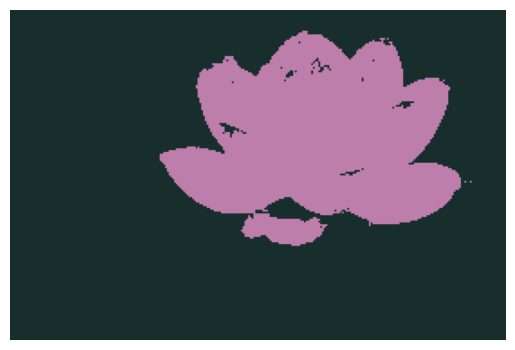

In [22]:
print("\nBest KMeans Clustered Image:")
kmeans_clustering.display_clustered_image(best_kmeans_clustered_image)


Best GMM Clustered Image:


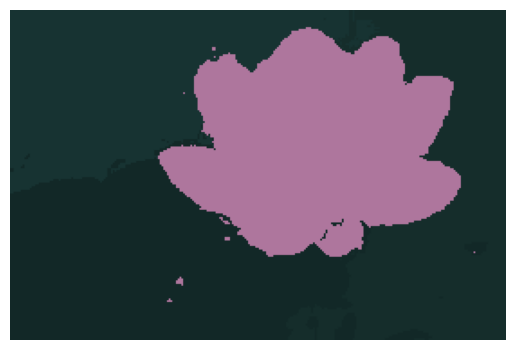

In [23]:
print("\nBest GMM Clustered Image:")
gmm_clustering.display_clustered_image(best_gmm_clustered_image)

In [ ]:
print("\nBest DBSCAN Clustered Image:")
dbscan_clustering.display_clustered_image(best_dbscan_clustered_image)

In [ ]:
best_dbscan_params = {'eps': 0.5, 'min_samples': 150}

In [ ]:
dbscan_clustering.image.shape

In [ ]:
print("\nBest DBSCAN Clustered Image:")
dbscan_clustering.display_clustered_image(best_dbscan_clustered_image)

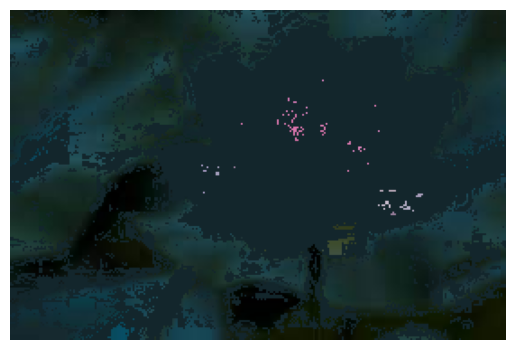

In [23]:
dbscan_clustering = ImageClustering(image_path, 'dbscan')
best_dbscan_params = {'eps': 3, 'min_samples':400}
best_dbscan_clustered_image =  dbscan_clustering.cluster_image(best_dbscan_params,
                                    preprocess_kwargs={'use_standardization': False, 'augment_with_coordinates': False})
dbscan_clustering.display_clustered_image(best_dbscan_clustered_image)

In [9]:
clustered_image.shape

(100, 150, 3)

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from PIL import Image

image_path = 'Second.jpg'

image = cv2.imread(image_path)

pil_image = Image.fromarray(image)

resized_pil_image = pil_image.resize((150, 100))

image = np.array(resized_pil_image)



h, w, c = image.shape
original_pixels = image.reshape((h * w, c))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

h, w, c = image_rgb.shape
pixel_values = image_rgb.reshape((h * w, c))
pixel_values = np.float32(pixel_values)

scaler = StandardScaler()
pixel_values = scaler.fit_transform(pixel_values)



eps = 0.3
min_samples = 10
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(pixel_values)

labels = dbscan.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

cluster_colors = np.zeros((np.max(labels) + 1, 3), dtype=np.uint8)
for label in np.unique(labels):
    if label != -1:
        cluster_colors[label] = np.mean(original_pixels[labels == label], axis=0)
    
clustered_image = np.zeros_like(pixel_values)
for label in range(n_clusters):
    clustered_image[labels == label] = cluster_colors[label]

if -1 in labels:
    clustered_image[labels == -1] = [0, 0, 0]

clustered_image = np.array([cluster_colors[label] if label != -1 else [0, 0, 0] for label in labels])
clustered_image = clustered_image.reshape(image_rgb.shape)

clustered_bgr = cv2.cvtColor(clustered_image, cv2.COLOR_RGB2BGR)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(clustered_bgr)
plt.title('Clustered Image')
plt.axis('off')

plt.show()


error: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 4 (CV_32S)


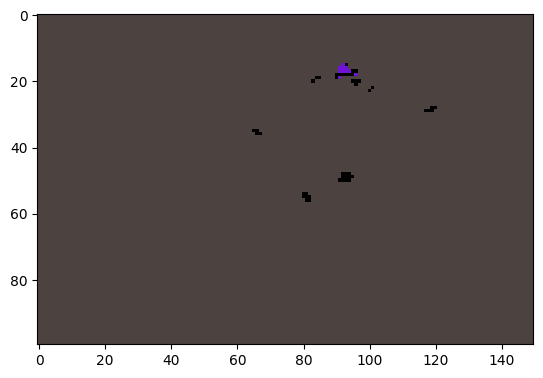

In [10]:
import matplotlib.pyplot as plt

plt.imshow(clustered_image)
plt.show()